In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("vocal_gender_features_new.csv")

In [5]:
df['rms_energy'].max()

np.float64(0.18757713)

In [3]:
df.shape

(16148, 44)

In [4]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [6]:
print(df.describe())


       mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
count            16148.000000           16148.000000             16148.000000   
mean              1709.269730            1027.564673              1584.195931   
std                315.558063             286.303662               126.360465   
min                719.559285             194.998983              1106.939002   
25%               1475.078509             829.195585              1503.301521   
50%               1703.038854            1048.531356              1583.959951   
75%               1921.202685            1233.451527              1665.806788   
max               3059.390150            1912.173446              2046.070801   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
count            16148.000000            16148.000000            16148.000000   
mean               432.492328               20.395652                0.023086   
std                 78.7232

In [7]:
df.isnull().sum()


mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [9]:
df.shape

(16148, 44)

In [12]:
df.duplicated().sum()


np.int64(1078)

In [13]:
df.drop_duplicates(inplace=True)


In [14]:
df.shape

(15070, 44)

In [15]:
df.duplicated().sum()


np.int64(0)

In [16]:
df['label'].value_counts()

label
1    9841
0    5229
Name: count, dtype: int64

CLASS COUNTS

<Axes: xlabel='label'>

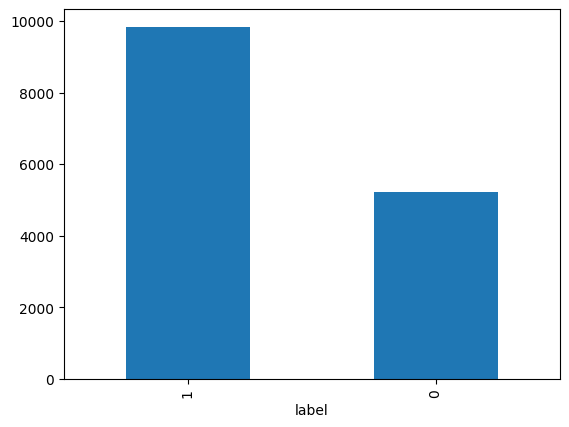

In [19]:
df['label'].value_counts().plot(kind='bar')


1: male 0:female

MEAN PITCH OF CLASSES

In [23]:
mean_female=df[df['label']==0]['mean_pitch'].max()
mean_male=df[df['label']==1]['mean_pitch'].max()


In [24]:
values = [mean_male, mean_female]
labels = ['Label 1', 'Label 0']

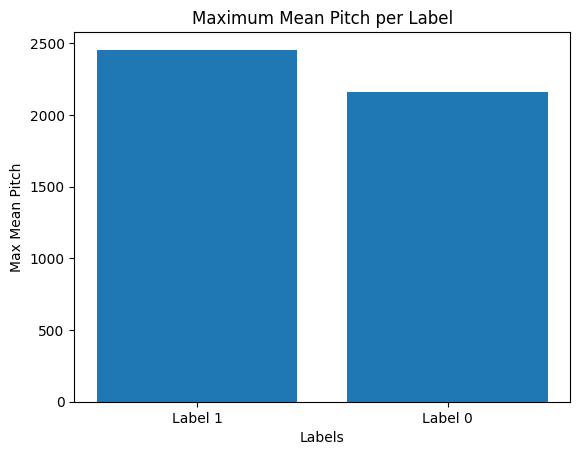

In [25]:
plt.figure()
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Max Mean Pitch')
plt.title('Maximum Mean Pitch per Label')
plt.show()

COORELATION 

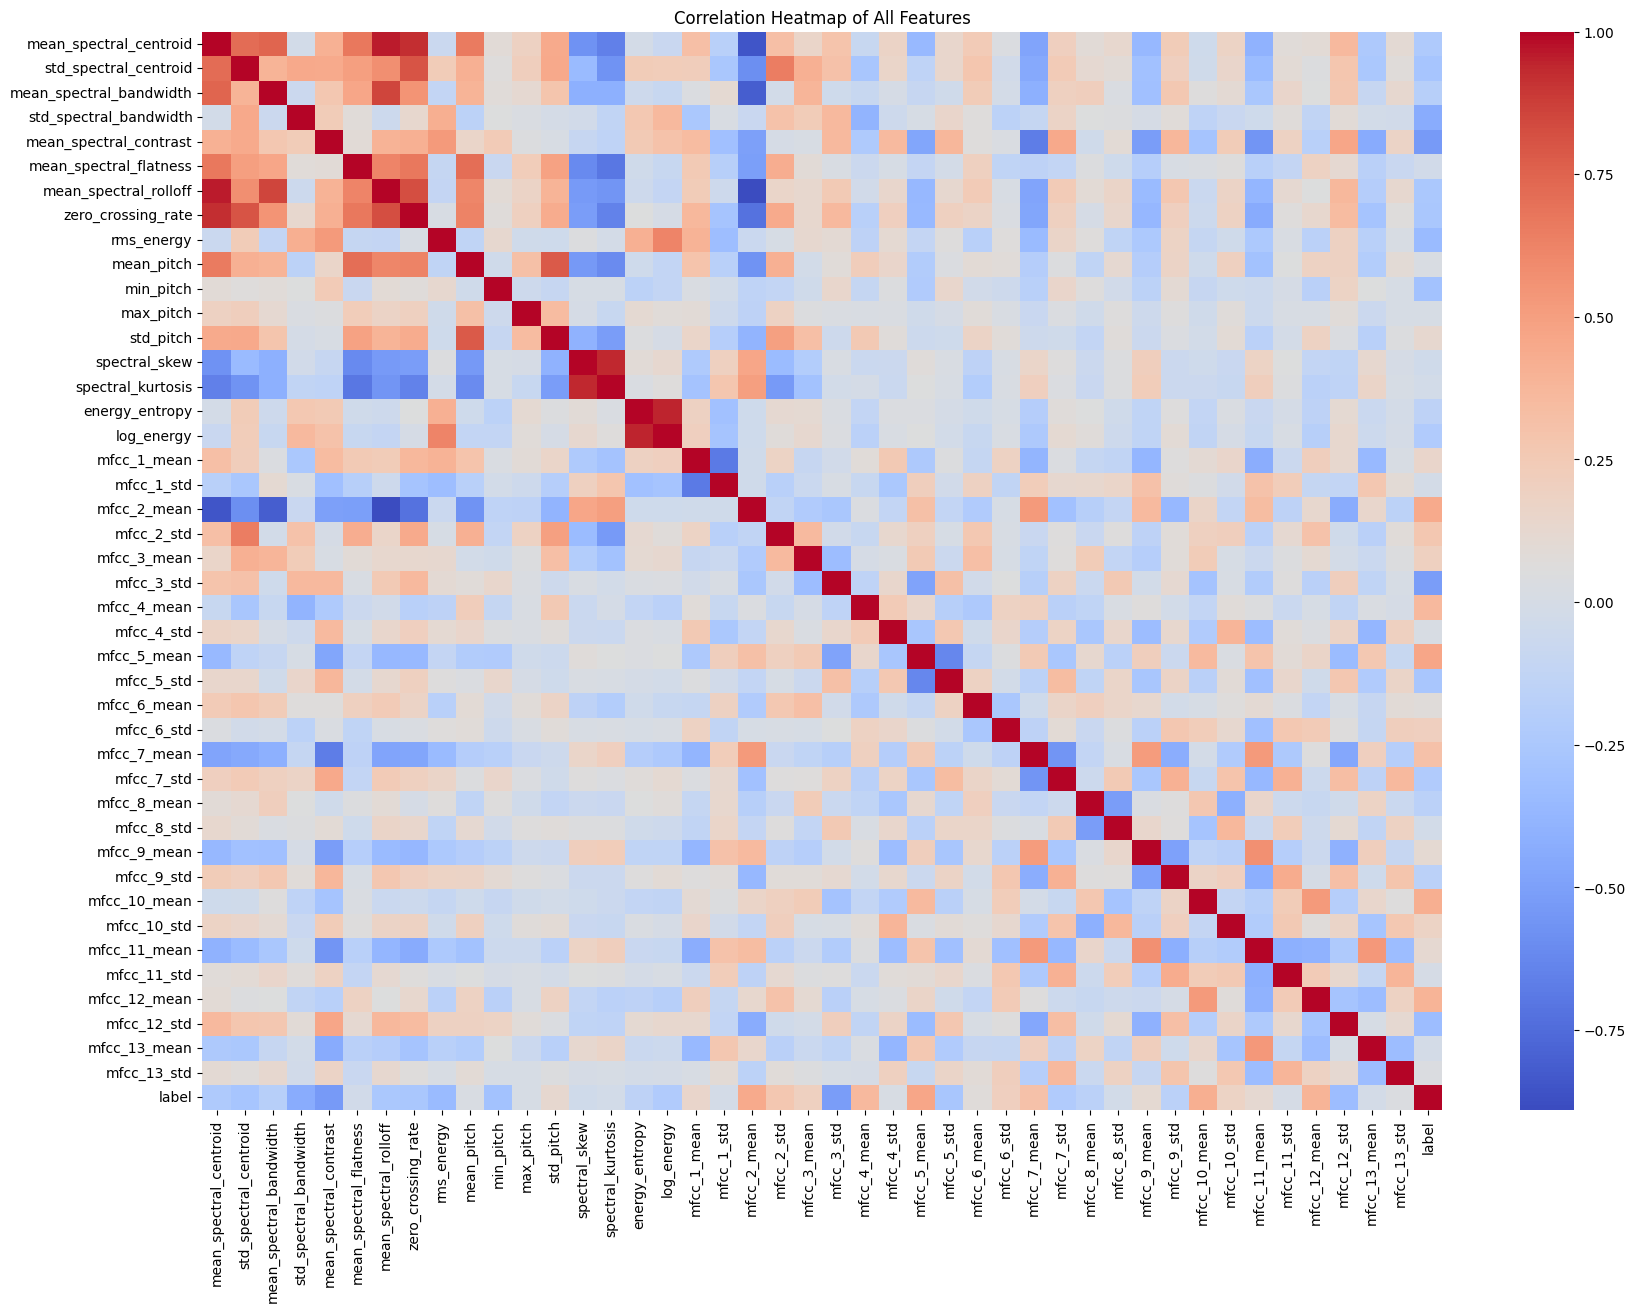

In [26]:
corr = df.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of All Features")
plt.show()

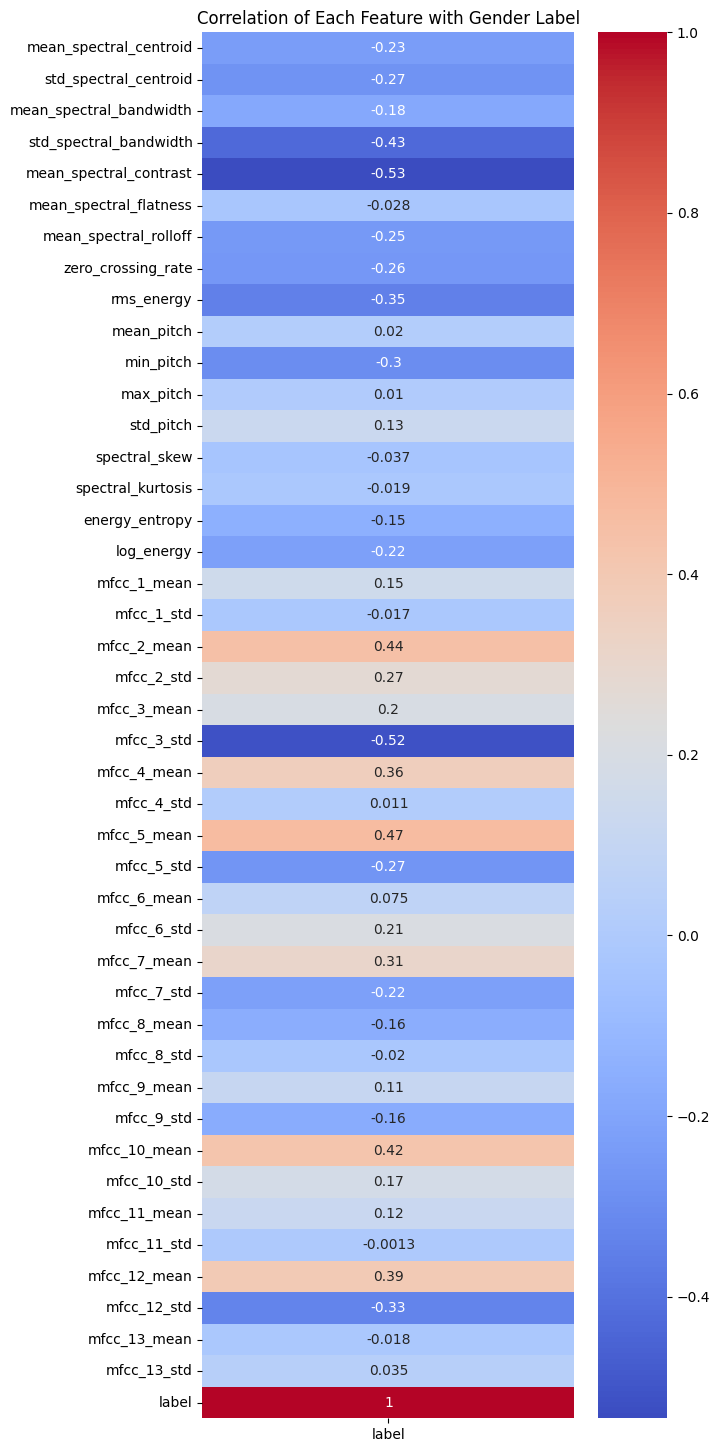

In [27]:

corr = df.corr()[['label']]   # double brackets → convert to 2D

plt.figure(figsize=(6, 18))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation of Each Feature with Gender Label")
plt.show()


LOUDNESS FOR WOMEN AND MEN

In [28]:
df['rms_energy'].describe()


count    15070.000000
mean         0.084099
std          0.022540
min          0.022425
25%          0.067177
50%          0.082656
75%          0.099309
max          0.187577
Name: rms_energy, dtype: float64

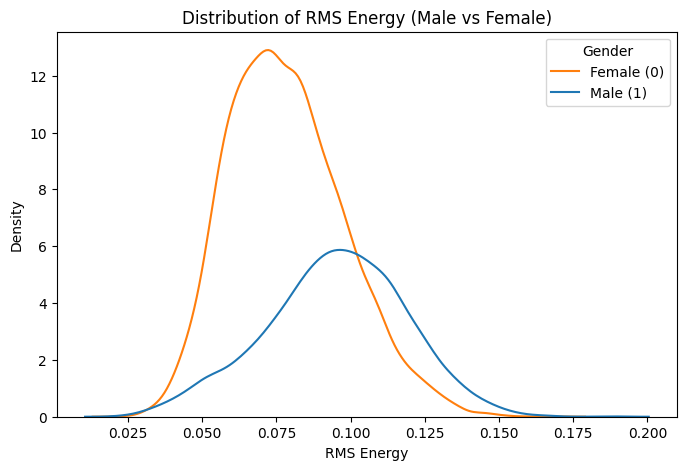

In [29]:

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='rms_energy', hue='label')

plt.title("Distribution of RMS Energy (Male vs Female)")
plt.xlabel("RMS Energy")
plt.legend(title="Gender", labels=["Female (0)", "Male (1)"])
plt.show()


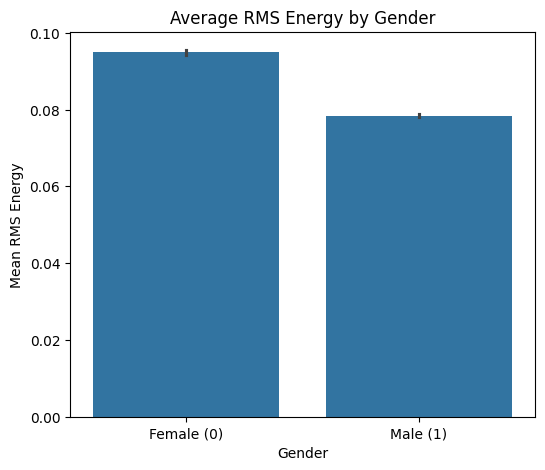

In [30]:


plt.figure(figsize=(6,5))
sns.barplot(data=df, x='label', y='rms_energy', estimator='mean')
plt.title("Average RMS Energy by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean RMS Energy")
plt.xticks([0,1], ['Female (0)', 'Male (1)'])
plt.show()


In [31]:
df.groupby('label')['rms_energy'].agg(['mean', 'min', 'max'])


,mean,min,max
label,,,
0,0.094873,0.023353,0.187577
1,0.078374,0.022425,0.169614


Mean spectral centroid indicating brightness

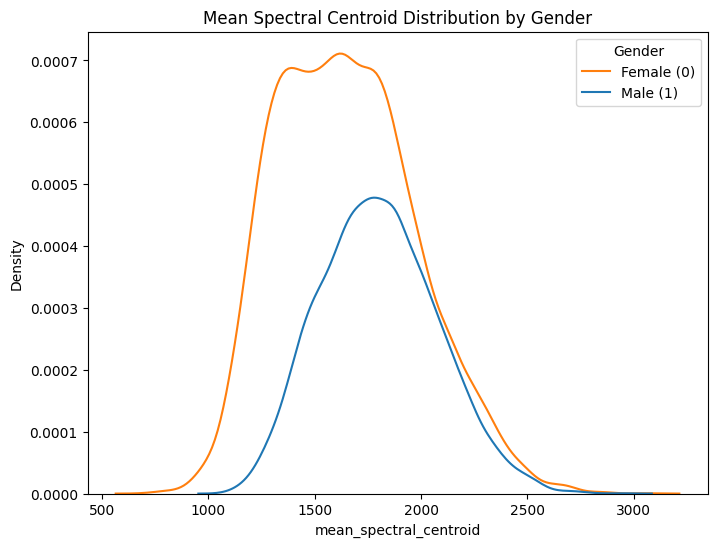

In [32]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="mean_spectral_centroid", hue='label', fill=False)
plt.title("Mean Spectral Centroid Distribution by Gender")
plt.xlabel("mean_spectral_centroid")
plt.legend(title="Gender", labels=["Female (0)", "Male (1)"])
plt.show()


mean_spectral_rolloff for sharpness

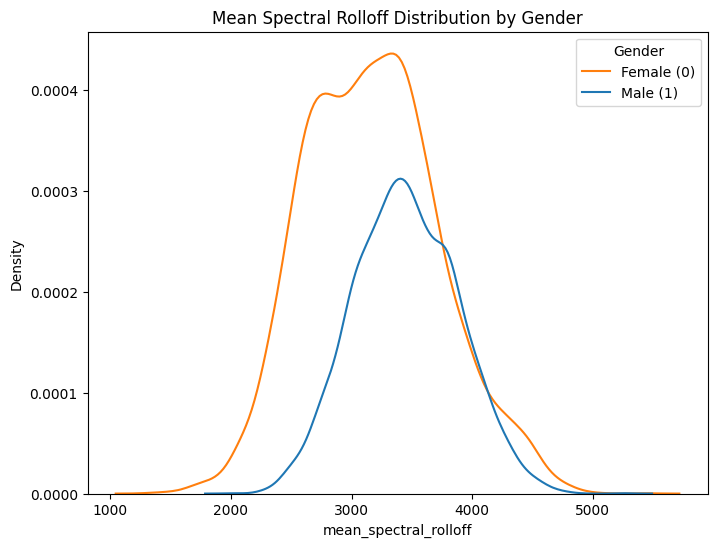

In [33]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="mean_spectral_rolloff", hue='label')

plt.title("Mean Spectral Rolloff Distribution by Gender")
plt.xlabel("mean_spectral_rolloff")
plt.legend(title="Gender", labels=["Female (0)", "Male (1)"])
plt.show()


k means clustering


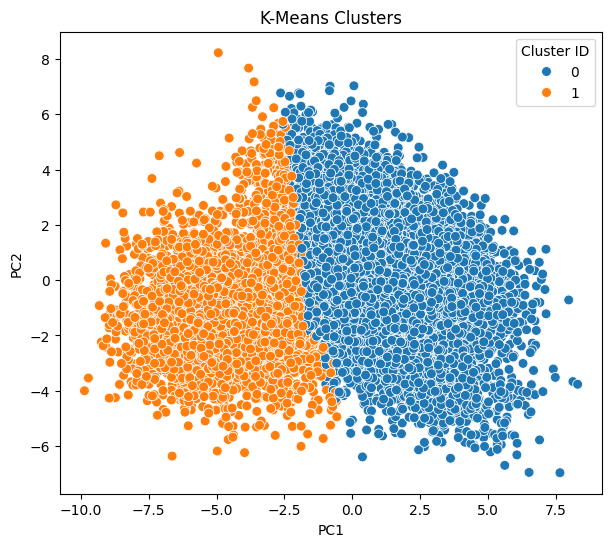

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=["label"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters,
    palette="tab10",
    s=50
)
plt.title("K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster ID")
plt.show()


Even if a male and female have the same pitch value, the female voice generally has a brighter spectral distribution.

As pitch increases, spectral centroid also increases.

The difference arises because clustering was performed on different feature spaces — one on the full standardized dataset, and another on a reduced selected feature subset with a pre-trained PCA transformation.